<a href="https://colab.research.google.com/github/abdularif0705/cyber-traffic-data/blob/main/Model/Traffic_IntersectionID_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing python standard packages
from datetime import date, timedelta as td
import pandas as pd
import requests
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
#start date and end date
start_date = date(2020, 1, 1)
end_date = date(2020, 12, 31)

date_diff = end_date - start_date
print(date_diff)
for i in range(date_diff.days + 1):
    dates = start_date + td(days=i)
    url = "https://opendata.citywindsor.ca/api/traffic?date="+str(dates)+"&intersectionId=3&start_time=00%3A00&end_time=23%3A59"
    #print(url)
    if i == 0:
      df = requests.get(url = url,verify=False)
data_2020 = pd.DataFrame.from_dict(df.json(), orient='columns')
data_2020

365 days, 0:00:00


,intersectionId,intersectionDescription,traffic
0,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:01:00', 'vehicleT..."
1,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:01:00', 'vehicleT..."
2,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:01:00', 'vehicleT..."
3,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:02:00', 'vehicleT..."
4,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:02:00', 'vehicleT..."
...,...,...,...
7403,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T23:58:00', 'vehicleT..."
7404,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T23:58:00', 'vehicleT..."
7405,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T23:59:00', 'vehicleT..."
7406,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T23:59:00', 'vehicleT..."


In [4]:
df1 = pd.DataFrame(data_2020['traffic'].values.tolist())
df1.head()

,timeStamp,vehicleType,entrance,exit,qty,isDaylightSavingsTime
0,2020-01-01T00:01:00,Light,N,E,1,False
1,2020-01-01T00:01:00,Light,N,S,1,False
2,2020-01-01T00:01:00,Light,S,N,4,False
3,2020-01-01T00:02:00,Light,N,S,1,False
4,2020-01-01T00:02:00,Light,N,W,1,False


In [5]:
data_2020 = pd.concat([data_2020,df1], axis=1)
data_2020.shape

(7408, 9)

In [6]:
#start date and end date
start_date = date(2021, 1, 1)
end_date = date(2021, 9, 24)

date_diff = end_date - start_date
print(date_diff)
for i in range(date_diff.days + 1):
    dates = start_date + td(days=i)
    url = "https://opendata.citywindsor.ca/api/traffic?date="+str(dates)+"&intersectionId=1&start_time=00%3A00&end_time=23%3A59"
    #print(url)
    if i == 0:
      df = requests.get(url = url,verify=False)
data_2021 = pd.DataFrame.from_dict(df.json(), orient='columns')
data_2021

266 days, 0:00:00


,intersectionId,intersectionDescription,traffic
0,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T00:00:00', 'vehicleT..."
1,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T00:00:00', 'vehicleT..."
2,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T00:00:00', 'vehicleT..."
3,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T00:01:00', 'vehicleT..."
4,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T00:01:00', 'vehicleT..."
...,...,...,...
4476,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:57:00', 'vehicleT..."
4477,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:58:00', 'vehicleT..."
4478,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:58:00', 'vehicleT..."
4479,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:58:00', 'vehicleT..."


In [7]:
df2 = pd.DataFrame(data_2021['traffic'].values.tolist())
df2.head()

,timeStamp,vehicleType,entrance,exit,qty,isDaylightSavingsTime
0,2021-01-01T00:00:00,ArticulatedTruck,N,S,1,False
1,2021-01-01T00:00:00,Light,E,S,1,False
2,2021-01-01T00:00:00,Light,S,N,4,False
3,2021-01-01T00:01:00,ArticulatedTruck,S,N,1,False
4,2021-01-01T00:01:00,Light,S,N,5,False


In [8]:
data_2021 = pd.concat([data_2021,df2], axis=1)
data_2021.shape

(4481, 9)

In [9]:
data = pd.concat([data_2020,data_2021], axis=0)
data.shape

(11889, 9)

In [10]:
data

,intersectionId,intersectionDescription,traffic,timeStamp,vehicleType,entrance,exit,qty,isDaylightSavingsTime
0,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:01:00', 'vehicleT...",2020-01-01T00:01:00,Light,N,E,1,False
1,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:01:00', 'vehicleT...",2020-01-01T00:01:00,Light,N,S,1,False
2,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:01:00', 'vehicleT...",2020-01-01T00:01:00,Light,S,N,4,False
3,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:02:00', 'vehicleT...",2020-01-01T00:02:00,Light,N,S,1,False
4,3,Malden Road and Huron Church Road,"{'timeStamp': '2020-01-01T00:02:00', 'vehicleT...",2020-01-01T00:02:00,Light,N,W,1,False
...,...,...,...,...,...,...,...,...,...
4476,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:57:00', 'vehicleT...",2021-01-01T23:57:00,Light,N,S,2,False
4477,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:58:00', 'vehicleT...",2021-01-01T23:58:00,ArticulatedTruck,S,N,1,False
4478,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:58:00', 'vehicleT...",2021-01-01T23:58:00,Light,E,N,1,False
4479,1,Dorchester Road and Huron Church Road,"{'timeStamp': '2021-01-01T23:58:00', 'vehicleT...",2021-01-01T23:58:00,Light,S,N,2,False


In [11]:
data.info()
data.to_csv('d.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11889 entries, 0 to 4480
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   intersectionId           11889 non-null  int64 
 1   intersectionDescription  11889 non-null  object
 2   traffic                  11889 non-null  object
 3   timeStamp                11889 non-null  object
 4   vehicleType              11889 non-null  object
 5   entrance                 11889 non-null  object
 6   exit                     11889 non-null  object
 7   qty                      11889 non-null  int64 
 8   isDaylightSavingsTime    11889 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 847.6+ KB


In [12]:
for col in data.select_dtypes('O').columns:
  print('In {} unique values:\n{}'.format(col,data[col].value_counts()))
  print('\n')

In intersectionDescription unique values:
Malden Road and Huron Church Road        7408
Dorchester Road and Huron Church Road    4481
Name: intersectionDescription, dtype: int64


In traffic unique values:
{'timeStamp': '2020-01-01T13:19:00', 'vehicleType': 'Light', 'entrance': 'E', 'exit': 'W', 'qty': 3, 'isDaylightSavingsTime': False}               1
{'timeStamp': '2021-01-01T15:57:00', 'vehicleType': 'Light', 'entrance': 'E', 'exit': 'N', 'qty': 1, 'isDaylightSavingsTime': False}               1
{'timeStamp': '2020-01-01T04:00:00', 'vehicleType': 'Light', 'entrance': 'N', 'exit': 'W', 'qty': 2, 'isDaylightSavingsTime': False}               1
{'timeStamp': '2021-01-01T02:40:00', 'vehicleType': 'Light', 'entrance': 'S', 'exit': 'N', 'qty': 2, 'isDaylightSavingsTime': False}               1
{'timeStamp': '2020-01-01T11:55:00', 'vehicleType': 'Light', 'entrance': 'E', 'exit': 'S', 'qty': 4, 'isDaylightSavingsTime': False}               1
                                                 

In [13]:
Typeoftruck = ['Light','Bus', 'Bicycle','WorkVan','ArticulatedTruck','SingleUnitTruck']
Direction = ['N','S','E','W']

In [14]:
dir = ['N']
typ = ['Light']

In [15]:
data = data.drop(['intersectionId','intersectionDescription','traffic','isDaylightSavingsTime'],axis=1)

In [16]:
vehicle = data[data.vehicleType.isin(Typeoftruck)]

In [17]:
vehicle['timeStamp'] = pd.to_datetime(vehicle['timeStamp'])

vehicle['day_of_week'] = vehicle['timeStamp'].dt.dayofweek
vehicle['day'] = vehicle['timeStamp'].dt.day
vehicle['day_of_year'] = vehicle['timeStamp'].dt.dayofyear
vehicle['year'] = vehicle['timeStamp'].dt.year
vehicle['month'] = vehicle['timeStamp'].dt.month
vehicle['hours'] = vehicle['timeStamp'].dt.hour
#vehicle['minutes'] = vehicle['timeStamp'].dt.minute
vehicle.to_csv('v.csv')

In [18]:
vehicle.year.value_counts()

2020    7408
2021    4481
Name: year, dtype: int64

In [19]:
direction = vehicle[vehicle.entrance.isin(Direction)]
direction.to_csv('dir.csv')

In [20]:
hour_count = direction.groupby(
     ['day','month','year','day_of_year','day_of_week','hours']
 ).agg(
     Vehicles = ('qty','sum'),
 ).reset_index()

In [21]:
hour_count

,day,month,year,day_of_year,day_of_week,hours,Vehicles
0,1,1,2020,1,2,0,629
1,1,1,2020,1,2,1,710
2,1,1,2020,1,2,2,540
3,1,1,2020,1,2,3,391
4,1,1,2020,1,2,4,285
5,1,1,2020,1,2,5,232
6,1,1,2020,1,2,6,319
7,1,1,2020,1,2,7,390
8,1,1,2020,1,2,8,473
9,1,1,2020,1,2,9,670


In [22]:
model_data = hour_count[:25]
unseen_data = hour_count[25:]

In [23]:
#importing packages and creating models

import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [24]:
# Storing the independent variables in X:
X=hour_count.drop(['Vehicles'], axis=1)

# Storing the dependent variable in y:
y=hour_count.Vehicles

# Importing train_test_split from sklearn library:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2,shuffle=True)

In [25]:
#Training Models
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import metrics
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)

In [26]:
#calculating train accuracy
score = xgbr.score(xtrain, ytrain)  
print("Training score: ", score)

Training score:  0.9995642916764189


In [27]:
scores = xgbr.score(xtest, ytest)
print("Testing score: ", scores)

Testing score:  0.9406154163983489


In [28]:
ypred = xgbr.predict(xtest)

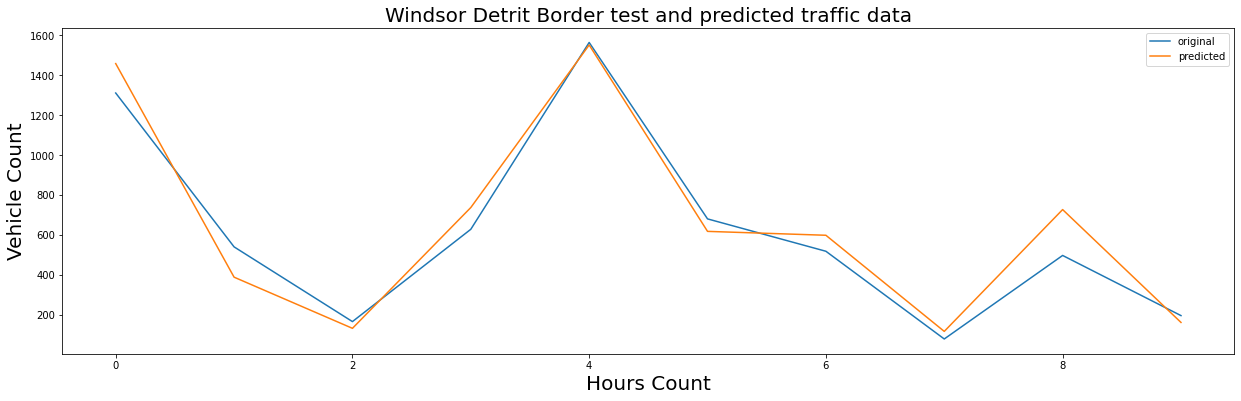

In [29]:
plt.subplots(figsize=(21,6))
x_ax = range(len(ytest))
plt.xlabel('Hours Count',size=20)
plt.ylabel('Vehicle Count',size=20)
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Windsor Detrit Border test and predicted traffic data",size=20)
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
scores_xg=cross_val_score(xgbr,X, y, cv=None)
print("Score :"+str(scores_xg))
print("Mean accuracy of the model: "+str(scores_xg.mean()))

Score :[-12.27676688  -7.62339273   0.22539025   0.83650598  -0.42961365]
Mean accuracy of the model: -3.853575407248067


In [31]:
# Storing the independent variables in X:
X_unseen=hour_count.drop(['Vehicles'], axis=1)

# Storing the dependent variable in y:
y_unseen=hour_count.Vehicles

In [32]:
score_unseen = xgbr.score(X_unseen, y_unseen)
print('Accuracy of unseen data: ',score_unseen)

Accuracy of unseen data:  0.9870878636472861


In [33]:
ypred_unseen = xgbr.predict(X_unseen)

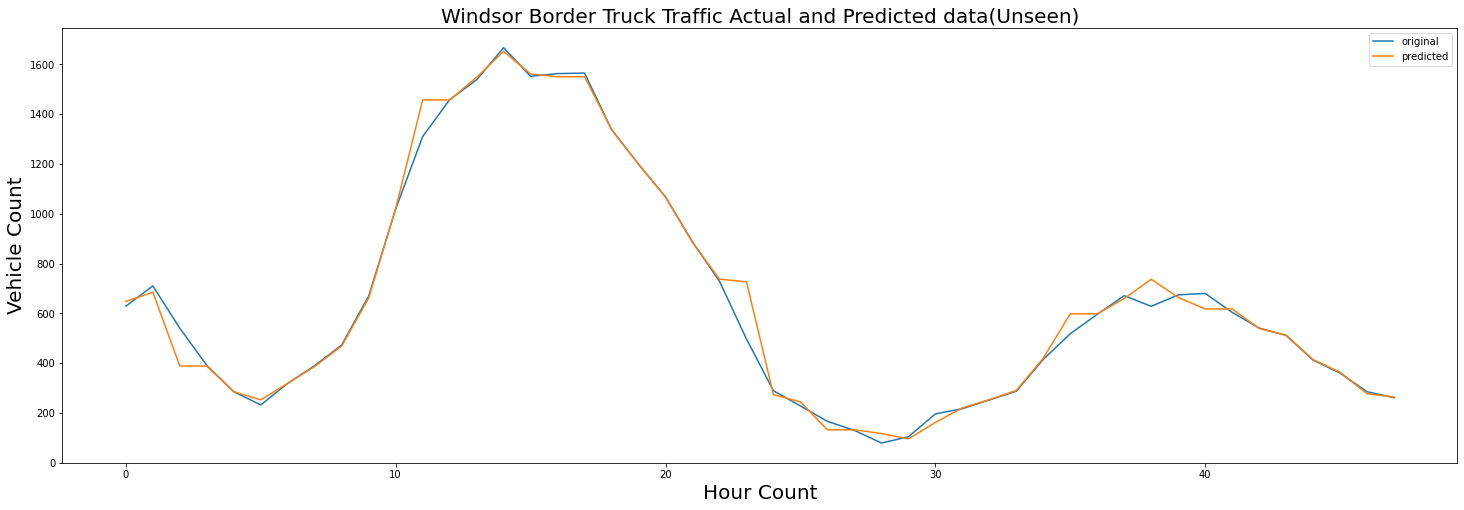

In [34]:
plt.subplots(figsize=(25,8))
x_ax_unseen = range(len(y_unseen))
plt.xlabel('Hour Count',size=20)
plt.ylabel('Vehicle Count',size=20)
plt.plot(x_ax_unseen, y_unseen, label="original")
plt.plot(x_ax_unseen, ypred_unseen, label="predicted")
plt.title("Windsor Border Truck Traffic Actual and Predicted data(Unseen)",size=20)
plt.legend()
plt.show()